In [4]:
from json import load

with open("mappa.json","r") as file_configurazione:
    mappa_conversione = load(file_configurazione)

Trasforma RAVDESS da formato per SER a formato comodo per EVC

In [5]:

with open("./eng/RAVDESS/file.txt","r") as contenitore_path_file:
    files = contenitore_path_file.readlines()

emozioni = mappa_conversione["datasets"][0]["parametri"]["emozione"]["conversione"]
dataset = open("./eng/ravdess.csv","w")
dataset.write("dataset;lang;path;actor_id;gender;emotion;statement_id\n")
for file in files:
    corpo_utile = file.split(".")[0].split("_")[-1]
    id_attore = corpo_utile.split("-")[mappa_conversione["datasets"][0]["parametri"]["attore"]["posizione"]]
    try:
        emozione = emozioni[corpo_utile.split("-")[mappa_conversione["datasets"][0]["parametri"]["emozione"]["posizione"]]]
    except KeyError:
        continue
    sesso = file.split("_")[mappa_conversione["datasets"][0]["parametri"]["sesso"]["posizione"]].lower()
    id_testo = corpo_utile.split("-")[mappa_conversione["datasets"][0]["parametri"]["testo"]["posizione"]]
    dataset.write(f"ravdess;en;./eng/RAVDESS/{file.strip()};{id_attore};{sesso};{emozione};{id_testo}\n")
dataset.close()
    

Trasforma SAVEE da formato SER a formato per EVC

In [6]:
with open("./eng/SAVEE/file.txt","r") as contenitore_path_file:
    files = contenitore_path_file.readlines()

emozioni = mappa_conversione["datasets"][1]["parametri"]["emozione"]["conversione"]
separatore = mappa_conversione["datasets"][1]["separatore"]
parametri = mappa_conversione["datasets"][1]["parametri"]
dataset = open("./eng/savee.csv","w")
dataset.write("dataset;lang;path;actor_id;gender;emotion;statement_id\n")
for file in files:
    corpo_utile = file.split(".")[0]
    sesso = corpo_utile.split(separatore)[parametri["sesso"]["posizione"]].lower()
    id_attore = corpo_utile.split(separatore)[parametri["attore"]["posizione"]]
    try:
        emozione = emozioni[corpo_utile.split(separatore)[parametri["emozione"]["posizione"]]]
    except KeyError:
        continue
    id_testo = corpo_utile.split(separatore)[parametri["testo"]["posizione"]][1:]
    dataset.write(f"savee;en;./eng/SAVEE/{file.strip()};{id_attore};{sesso};{emozione};{id_testo}\n")
dataset.close()

Trasforma ECARINI da formato SER a formato comodo per EVC

In [7]:
with open("./ita/ECARINI/file.txt","r") as contenitore_path_file:
    files = contenitore_path_file.readlines()

emozioni = mappa_conversione["datasets"][2]["parametri"]["emozione"]["conversione"]
separatore = mappa_conversione["datasets"][2]["separatore"]
parametri = mappa_conversione["datasets"][2]["parametri"]
dataset = open("./ita/ecarini.csv","w")
dataset.write("dataset;lang;path;actor_id;gender;emotion;statement_id\n")
for file in files:
    corpo_utile = file.split(".")[0]
    id_attore = corpo_utile.split(separatore)[parametri["attore"]["posizione"]]
    sesso = corpo_utile.split(separatore)[parametri["sesso"]["posizione"]].lower()
    try:
        emozione = emozioni[corpo_utile.split(separatore)[parametri["emozione"]["posizione"]]]
    except KeyError:
        continue
    id_testo = corpo_utile.split(separatore)[parametri["testo"]["posizione"]][3:]
    dataset.write(f"ecarini;it;./ita/ECARINI/{file.strip()};{id_attore};{sesso};{emozione};{id_testo}\n")
dataset.close()

Trasforma ESD da formato Standard a formato comodo per EVC

In [8]:
import pandas as pd 
import os 
import codecs
emozioni = mappa_conversione["datasets"][3]["parametri"]["emozione"]["conversione"]
mappa_sesso = mappa_conversione["datasets"][3]["parametri"]["sesso"]
dataset = open("./ita/demos.csv","w")
dataset.write("dataset;lang;path;actor_id;emotion;statement_id\n")

dataframe = pd.DataFrame([], columns=["dataset","lang","path","actor_id","gender","emotion","statement_id"])
dataframe = dataframe.set_index("path")

# Recupero id degli statement, perché variano a seconda dell'emozione, ma a noi conviene renderli indipendenti
statement_recover = pd.read_csv(f"./eng/ESD/0015/0015.txt", sep="\t",names=["info","text","emotion"], encoding="utf-8")
statement_recover = statement_recover.dropna()
statement_recover["statement_id"]=statement_recover["info"].map(lambda txt_info: str(txt_info).split("_")[1])
statement_recover=statement_recover[statement_recover["emotion"]=="Neutral"][["statement_id","text"]]

for actor in os.listdir("./eng/ESD"):
    actor_take = pd.read_csv(f"./eng/ESD/{actor}/{actor}.txt", sep="\t",names=["info","text","emotion"], encoding="utf-8")
    actor_take = actor_take.dropna()
    actor_take["emotion"] = actor_take["emotion"].map(lambda emotion: emotion.strip())
    actor_take = actor_take[actor_take.emotion != "Surprise"]

    actor_take=actor_take.merge(statement_recover)
    actor_take["gender"] = mappa_sesso[actor]
    actor_take["dataset"]="esd"
    actor_take["lang"]="en"
    actor_take["actor_id"] = actor_take["info"].map(lambda txt_info: txt_info.split("_")[0])
    actor_take["emotion"] = actor_take["emotion"].map(lambda emotion: emozioni[emotion])
    actor_take["path"] = "./eng/ESD/"+actor+"/"+actor_take["emotion"]+"/"+actor_take["info"]+".wav"
    
    actor_take=actor_take.drop("info", axis=1)
    dataframe = pd.concat([dataframe,actor_take], axis=0)
    
dataframe.to_csv("./eng/esd.csv",sep=";",index=False,columns=["dataset","lang","path","actor_id","gender","emotion","statement_id"])
dataset.close()

KeyboardInterrupt: 

Trasforma EMOVO da formato Standard a formato comodo per EVC

In [ ]:
with open("./ita/EMOVO/file.txt","r") as contenitore_path_file:
    files = contenitore_path_file.readlines()

emozioni = mappa_conversione["datasets"][5]["parametri"]["emozione"]["conversione"]
separatore = mappa_conversione["datasets"][5]["separatore"]
parametri = mappa_conversione["datasets"][5]["parametri"]
dataset = open("./ita/emovo.csv","w")
dataset.write("dataset;lang;path;actor_id;gender;emotion;statement_id\n")
for file in files:
    corpo_utile = file.split(".")[0]
    corpo_utile = corpo_utile.replace("-","_")
    id_attore = corpo_utile.split(separatore)[parametri["attore"]["posizione"]]
    try:
        emozione = emozioni[corpo_utile.split(separatore)[parametri["emozione"]["posizione"]]]
    except KeyError as keyex:
        continue
    sesso = corpo_utile.split(separatore)[parametri["sesso"]["posizione"]].lower()
    id_testo = corpo_utile.split(separatore)[parametri["testo"]["posizione"]]
    dataset.write(f"emovo;it;./ita/EMOVO/{file.strip()};{id_attore};{sesso};{emozione};{id_testo}\n")
dataset.close()

Trasforma EMOITA da formato Standard a formato comodo per EVC

In [ ]:
with open("./ita/EMOITA/file.txt","r") as contenitore_path_file:
    files = contenitore_path_file.readlines()

emozioni = mappa_conversione["datasets"][6]["parametri"]["emozione"]["conversione"]
separatore = mappa_conversione["datasets"][6]["separatore"]
parametri = mappa_conversione["datasets"][6]["parametri"]
dataset = open("./ita/emoita.csv","w")
dataset.write("dataset;lang;path;actor_id;gender;emotion;statement_id\n")
for file in files:
    corpo_utile = file.split(".")[0]
    corpo_utile = corpo_utile.replace("-","_")
    id_attore = corpo_utile.split(separatore)[parametri["attore"]["posizione"]]
    try:
        emozione = emozioni[corpo_utile.split(separatore)[parametri["emozione"]["posizione"]]]
    except KeyError as keyex:
        continue
    sesso = corpo_utile.split(separatore)[parametri["sesso"]["posizione"]].lower()
    id_testo = corpo_utile.split(separatore)[parametri["testo"]["posizione"]]
    dataset.write(f"emoita;it;./ita/EMOITA/{file.strip()};{id_attore};{sesso};{emozione};{id_testo}\n")
dataset.close()

Trasforma CaFE da formato Standard a formato comodo per EVC

In [20]:
with open("./fr/CaFe/text.txt","r") as contenitore_path_file:
    files = contenitore_path_file.readlines()
    
mappa_sesso = mappa_conversione["datasets"][8]["parametri"]["sesso"]["conversione"]
emozioni = mappa_conversione["datasets"][8]["parametri"]["emozione"]["conversione"]
dataset = open("./fr/cafe.csv","w")
dataset.write("dataset;lang;path;actor_id;gender;emotion;statement_id\n")
for file in files:
    corpo_utile = file.strip().split(".")[1].split("/")[-1].split("-")
    sesso = mappa_sesso[corpo_utile[0]]
    id_attore = f"{corpo_utile[0]}"
    try:
        emozione = emozioni[corpo_utile[1]]
    except KeyError:
        continue
    id_testo=corpo_utile[3]
    dataset.write(f"cafe;fr;./fr/CaFe/{file[2:].strip()};{id_attore};{sesso};{emozione};{id_testo}\n")
dataset.close()


Statistiche datasets

Elaboro dataset ESD
Elaboro dataset RAVDESS
Elaboro dataset SAVEE
Elaboro dataset CaFe
Elaboro dataset ECARINI
Elaboro dataset EMOVO
sad        3834
anger      3831
happy      3828
neutral    3733
Name: emotion, dtype: int64


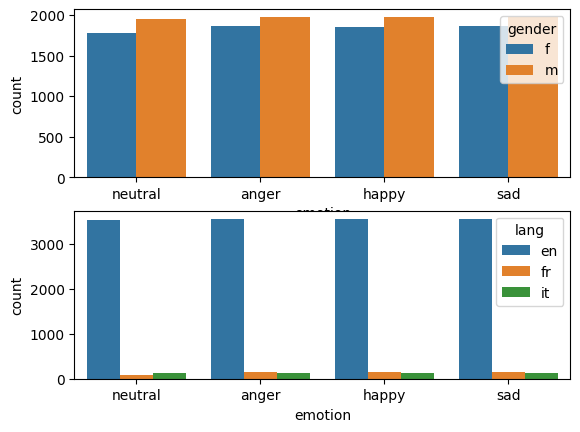

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

datasets = {
    "ESD":"./eng/esd.csv",
    "RAVDESS":"./eng/ravdess.csv",
    "SAVEE": "./eng/savee.csv",
    "CaFe": "./fr/cafe.csv",
    "ECARINI":"./ita/ecarini.csv",
    "EMOVO":"./ita/emovo.csv", 
}

dataframe = pd.DataFrame([])
for dataset, path in datasets.items():
    print(f"Elaboro dataset {dataset}")
    dataframe = pd.concat([dataframe, pd.read_csv(path, sep=";")], axis=0)
    

print(dataframe['emotion'].value_counts())

mappa_emozione = {
    "sad":1,
    "anger":2,
    "happy":3,
    "neutral":4
}

dataframe["emotion_id"] = dataframe['emotion'].map(lambda x: mappa_emozione[x])
dataframe["emotion_id"]
fig, axs = plt.subplots(2)

sns.countplot(data=dataframe, x="emotion", hue="gender", ax=axs[0])
sns.countplot(data=dataframe, x="emotion", hue="lang", ax=axs[1])
plt.show()

dataframe.to_csv("./dataset.csv",sep=";",index=False,columns=["dataset","lang","path","actor_id","gender","emotion","statement_id"])